<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/Pima%20Indians%20Diabetes%20Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [301]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from matplotlib import gridspec
import missingno as msno
import plotly.express as px
import matplotlib as mpl

In [2]:
!pip install plotly.express

In [302]:
data = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/당뇨병데이터셋.csv')

# **READ** **ME** ===== **당뇨데이터**

데이터의 출처는 kaggle이다.

데이터 columns는 총 9개이다. row는 768개이다.



> pregnancies : 임신 주차(범주형 데이터)

> Glucose : 포도당 수치(수치 데이터)

> BloodPressure : 혈압 수치(수치 데이터)

> SkinThickness : 피부 두깨..?(수치 데이터)

> Insuline : 인슐린 수치 (수치 데이터)

> BMI : BMI 지수 (수치 데이터)

> DiabetesPedigreeFunction : 당뇨혈통기능 (수치데이터)

> Age : 나이 (수치데이터)

> Outcome : 결과 (0,1, 범주형데이터)


# Progress...


1.   데이터 탑재
2.   데이터 살펴보기 및 null값 찾기
3.   데이터 클렌징
4.   데이터 시각화(EDA)
5.   데이터 모델링
6.   데이터 모델링 성능 검증
7.   데이터 모델링 평가


데이터의 난이도는 쉬움이다!!!

read me 쓰는 습관을 들이자!!!! 주석 다는 습관을 들이자!!!














In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
data.isnull().any() ## null 값은 없다.

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

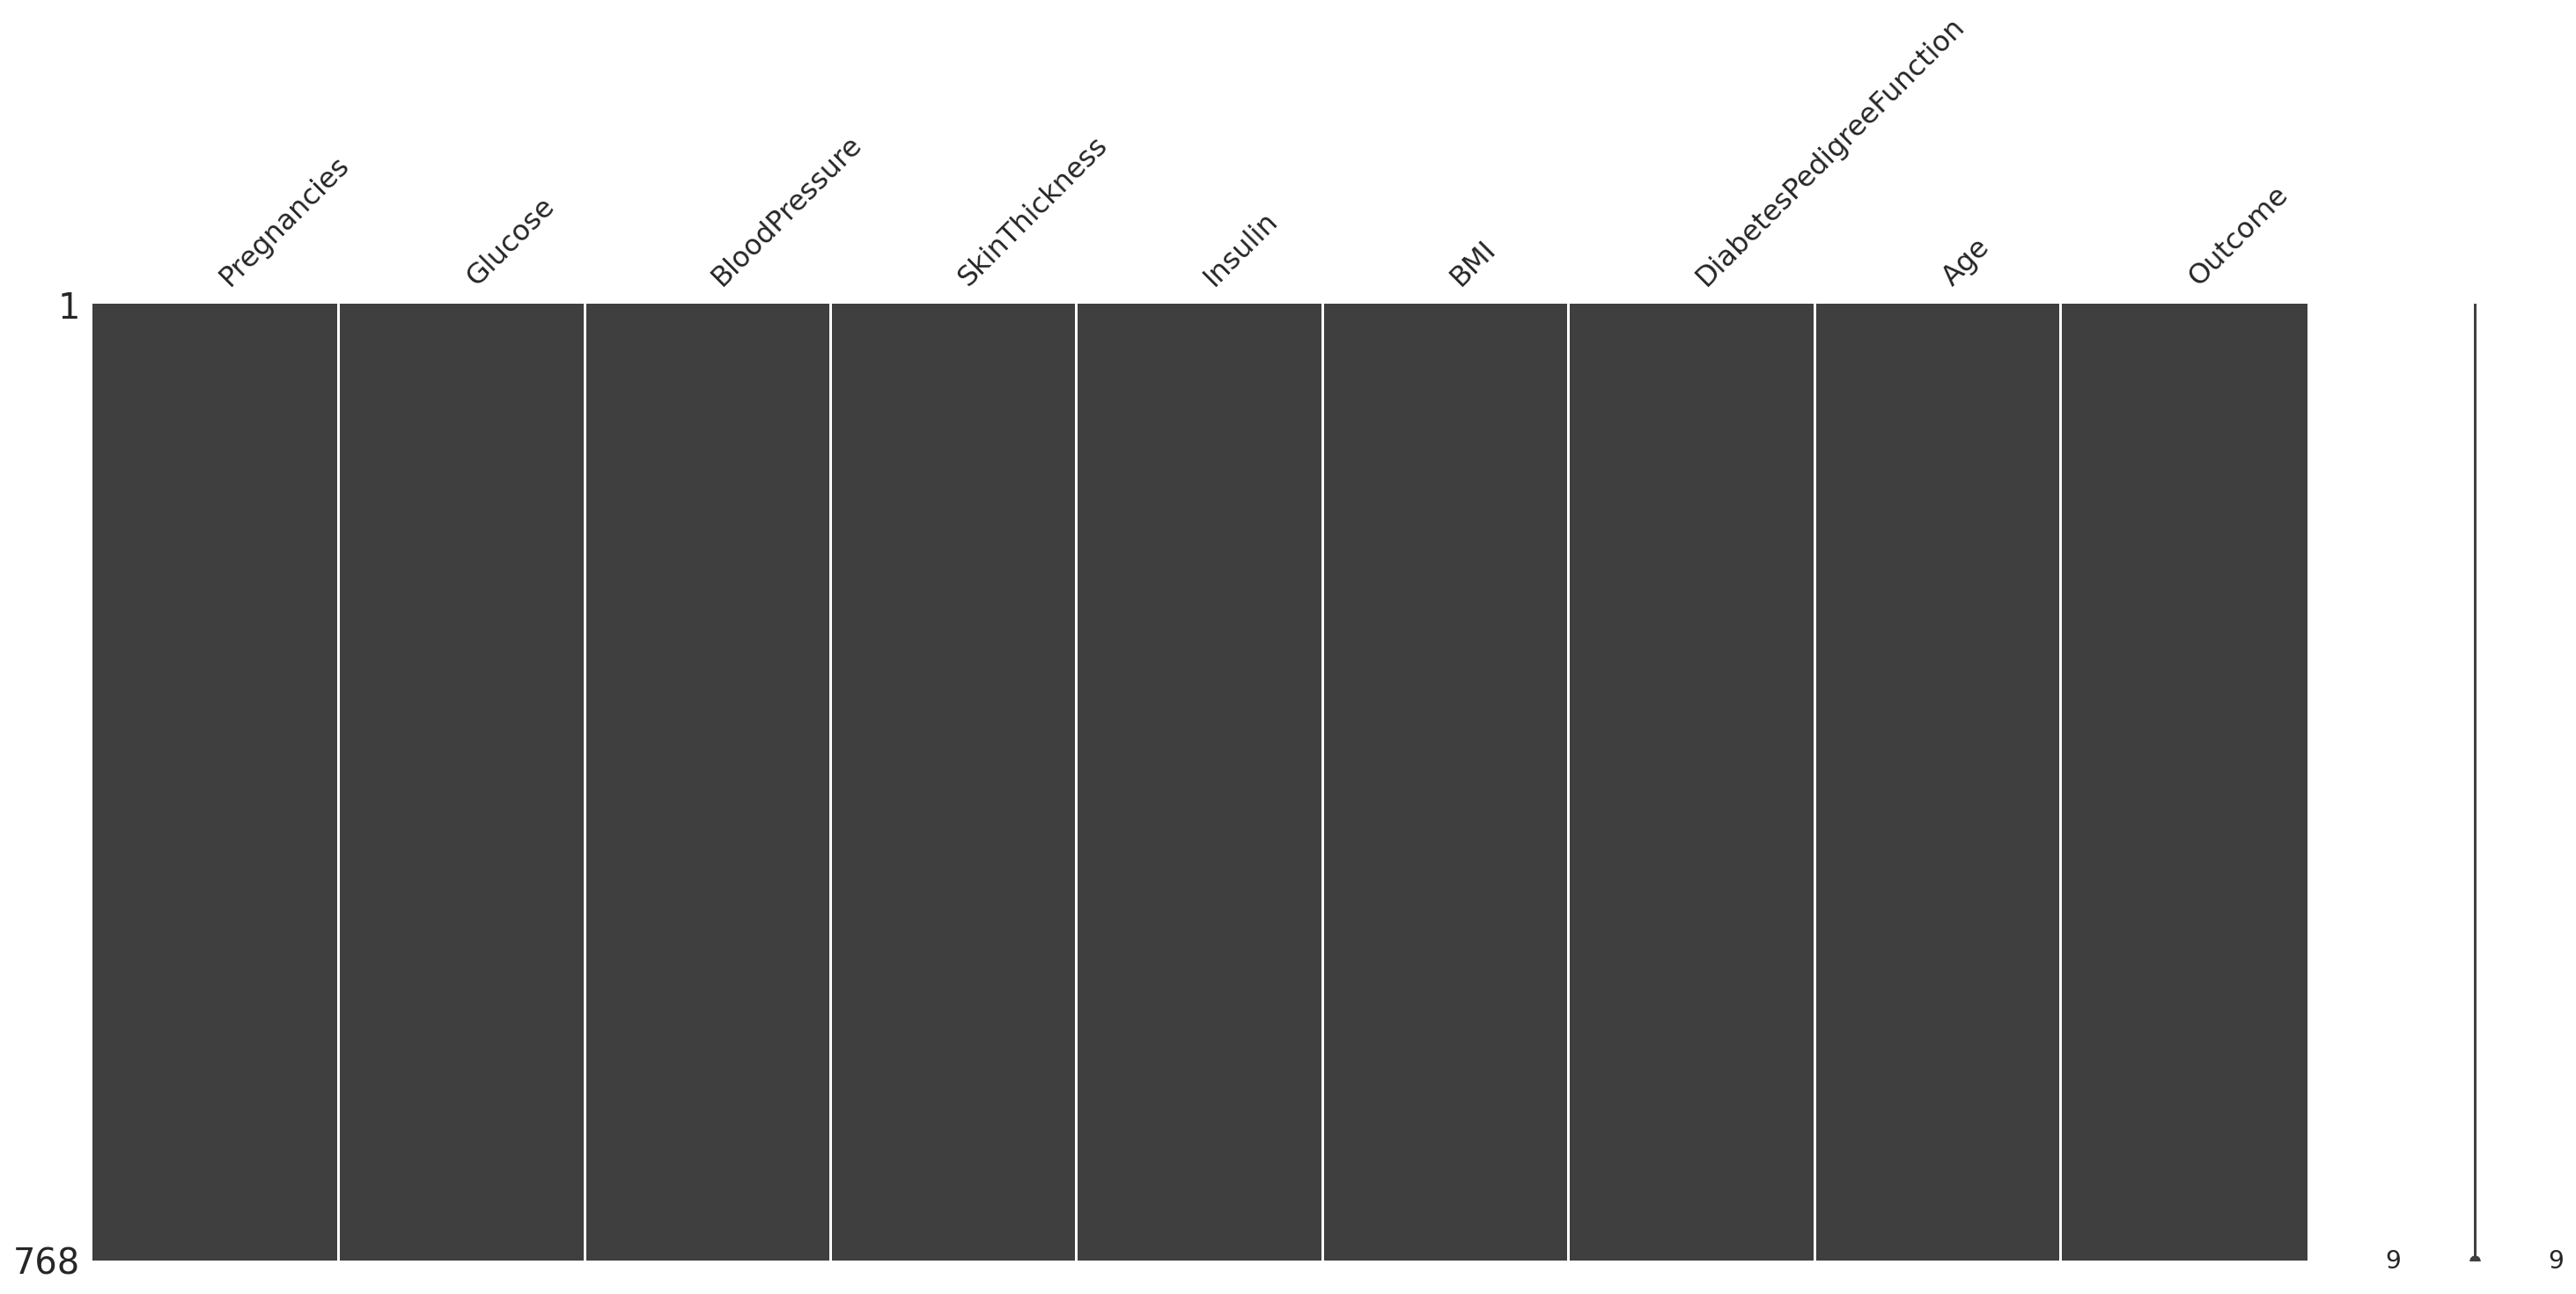

In [10]:
msno.matrix(data) ## null 값 시각화

In [14]:
data['Pregnancies'].value_counts().sort_index()

0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

# 데이터에 이상값이 너무 많다(대표적으로 0) 해결 방안은?




> 1. 이상값을 null값으로 만들어 binning(평균값, 중앙값)으로 치환하기


> 2. 상관관계를 참고해 해당 컬럼을 카테고리로 만들어서 카테고리별로 (평균값, 중앙값) 처리

> 3. 그냥 삭제(drop)



2번을 사용하겠다. == > 각 columns에서 0값이 절반이 넘는 columns이 있기 때문

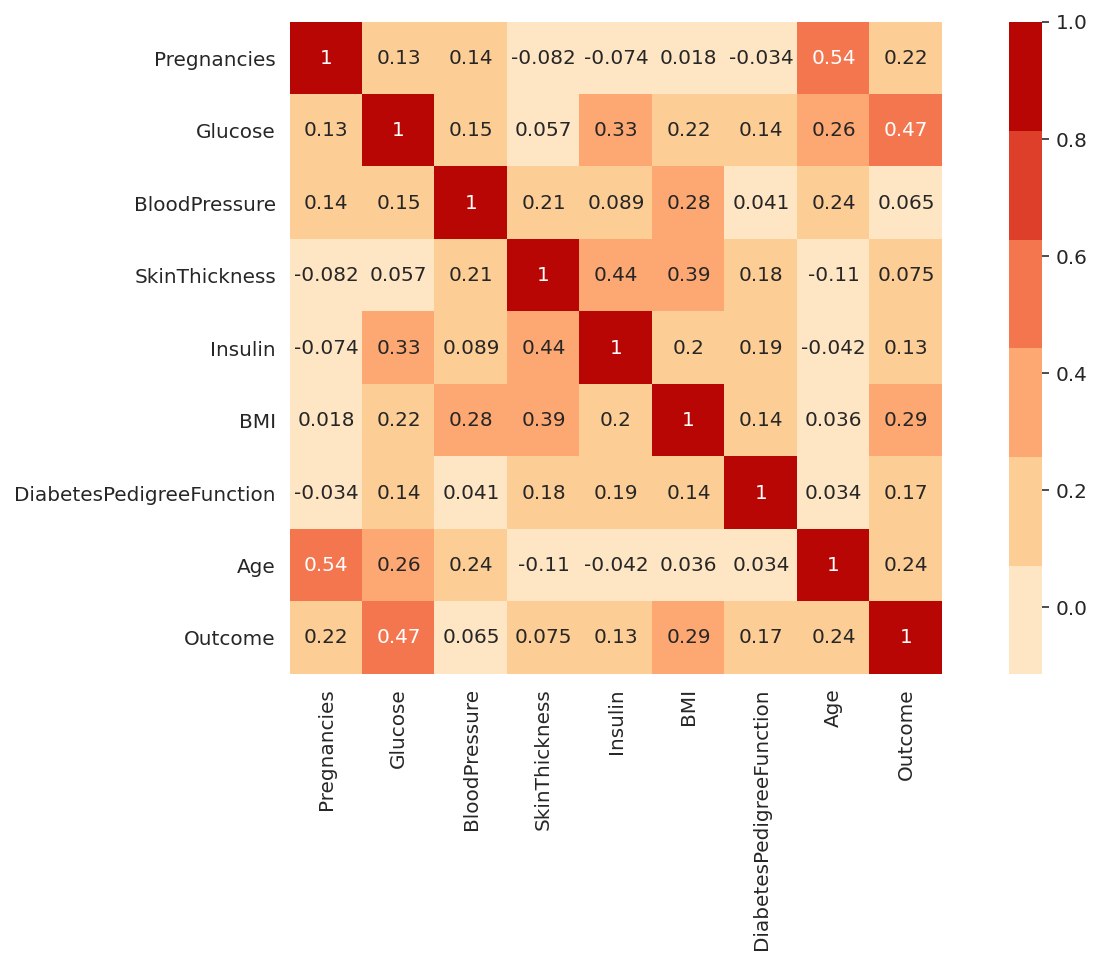

In [155]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True, cmap=sns.color_palette('OrRd'), square=True)
### Glucose는 Insulin과 Age, Outcome과 연관이 높다.

In [340]:
data.loc[(data['Glucose']==0)&(data['Outcome']==0), 'Glucose'] = data[(data.Age<25) & (data.Age>20)]['Glucose'].mean()
data.loc[(data['Glucose']==0)&(data['Outcome']==1), 'Glucose'] = data[(data.Age<45) & (data.Age>30)]['Glucose'].mean()
## 나이대로 Glucose 이상값처리

In [351]:
data.loc[(data.Glucose<=95.0), 'glu_cut'] = 'a'
data.loc[(data.Glucose>95.0)&(data.Glucose<=109.0), 'glu_cut'] = 'b'
data.loc[(data.Glucose>109.0)&(data.Glucose<=125.0), 'glu_cut'] = 'c'
data.loc[(data.Glucose>125.0)&(data.Glucose<=147.0), 'glu_cut'] = 'd'
data.loc[(data.Glucose>147.0), 'glu_cut'] = 'e'
## Glucose를 카테고리 컬럼으로 하나 생성

In [346]:
data.loc[data.Age<=22.0, 'Age_cut'] = '20대초반'    
data.loc[(data.Age>22.0)&(data.Age<=25.0), 'Age_cut'] = '20대중반'
data.loc[(data.Age>25.0)&(data.Age<=29.0), 'Age_cut'] = '20대후반'
data.loc[(data.Age>29.0)&(data.Age<=36.0), 'Age_cut'] = '30대'
data.loc[(data.Age>36.0)&(data.Age<=45.0), 'Age_cut'] = '중간'
data.loc[data.Age>45.0, 'Age_cut'] = '고령'
## Age_cut을 만들어 카테고리를 만들었다.

In [379]:
data.loc[data.BMI<=29.0, 'BMI_cut'] = 'lower'
data.loc[(data.BMI>29.0)&(data.BMI<=34.733), 'BMI_cut'] = 'norm'
data.loc[(data.BMI>34.733), 'BMI_cut'] = 'higher'
## BMI_cut을 카테고리로 만들었다.

In [396]:
data.loc[data.BloodPressure<=23.999, 'Blood_cut'] = '1st'    
data.loc[(data.BloodPressure>23.999)&(data.BloodPressure<=69.999), 'Blood_cut'] = '2nd'
data.loc[(data.BloodPressure>69.999)&(data.BloodPressure<=74.0), 'Blood_cut'] = '3rd'
data.loc[(data.BloodPressure>74.0)&(data.BloodPressure<=82.0), 'Blood_cut'] = '4rd'
data.loc[(data.BloodPressure>82.0), 'Blood_cut'] = '5rd'
## Blood_cut을 만들어 카테고리 컬럼 생성

In [420]:
data.loc[data.SkinThickness<=20.011, 'Skin_cut'] = '1st'    
data.loc[(data.SkinThickness>20.011)&(data.SkinThickness<=27.0), 'Skin_cut'] = '2nd'
data.loc[(data.SkinThickness>27.0)&(data.SkinThickness<=30.485), 'Skin_cut'] = '3rd'
data.loc[(data.SkinThickness>30.485)&(data.SkinThickness<=36.981), 'Skin_cut'] = '4rd'
data.loc[(data.BloodPressure>36.981), 'Skin_cut'] = '5rd'
## Skin_cut을 만들어 카테고리 컬럼 생성

In [422]:
a = data[data['Insulin']==0]
## a에는 해당 컬럼에서 이상치를 포함하는 데이터 변수

In [377]:
for i in a.index:
  data.loc[i, 'BMI'] = data[(data.Age_cut==data.loc[i].Age_cut)&(data.glu_cut==data.loc[i].glu_cut)]['BMI'].mean()
## BMI 채우기

In [381]:
for x in a.index:    
  data.loc[x, 'BloodPressure'] = data[(data.Age_cut == data.loc[x].Age_cut) & (data.BMI_cut == data.loc[x]['BMI_cut'])]['BloodPressure'].mean()
## BloodPressure 채우기 완료

In [406]:
for x in a.index:    
  data.loc[x, 'SkinThickness'] = data[(data.Blood_cut == data.loc[x].Blood_cut)&(data.BMI_cut == data.loc[x].BMI_cut)]['SkinThickness'].mean()
## SkinThickness 이상치 채우기 완료

In [423]:
for i in a.index:
  data.loc[i, 'Insulin'] = data[(data.glu_cut == data.loc[i]['glu_cut']) & (data.Skin_cut == data.loc[i]['Skin_cut'])]['Insulin'].mean()
## Insulin 이상치 채우기 완료

이상값 처리 완료

너무 주관적이지 않을까 고민...

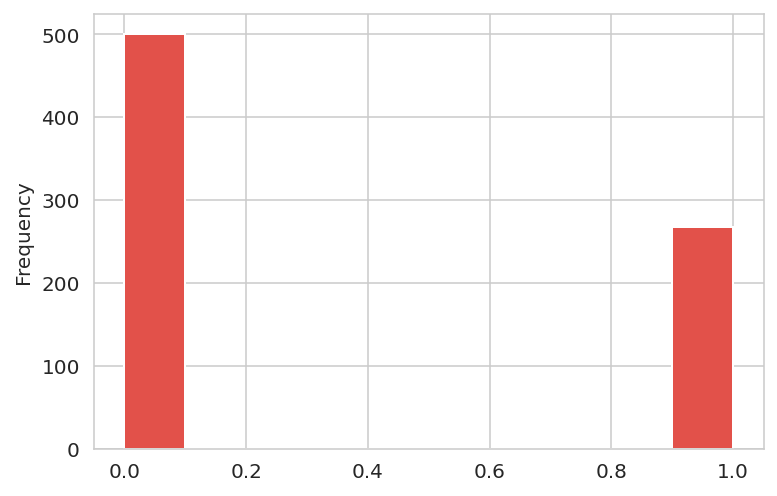

In [49]:
data['Outcome'].plot.hist()
## 환자와 비환자가 절반 차이난다.

In [15]:
data.groupby('Outcome')['Pregnancies'].value_counts()   ## 첫번째 EDA Pregnancies와 outcome groupby

Outcome  Pregnancies
0        1              106
         2               84
         0               73
         3               48
         4               45
         5               36
         6               34
         7               20
         8               16
         10              14
         9               10
         12               5
         13               5
         11               4
1        0               38
         1               29
         3               27
         7               25
         4               23
         8               22
         5               21
         2               19
         9               18
         6               16
         10              10
         11               7
         13               5
         12               4
         14               2
         15               1
         17               1
Name: Pregnancies, dtype: int64

Text(0.5, 0, '')

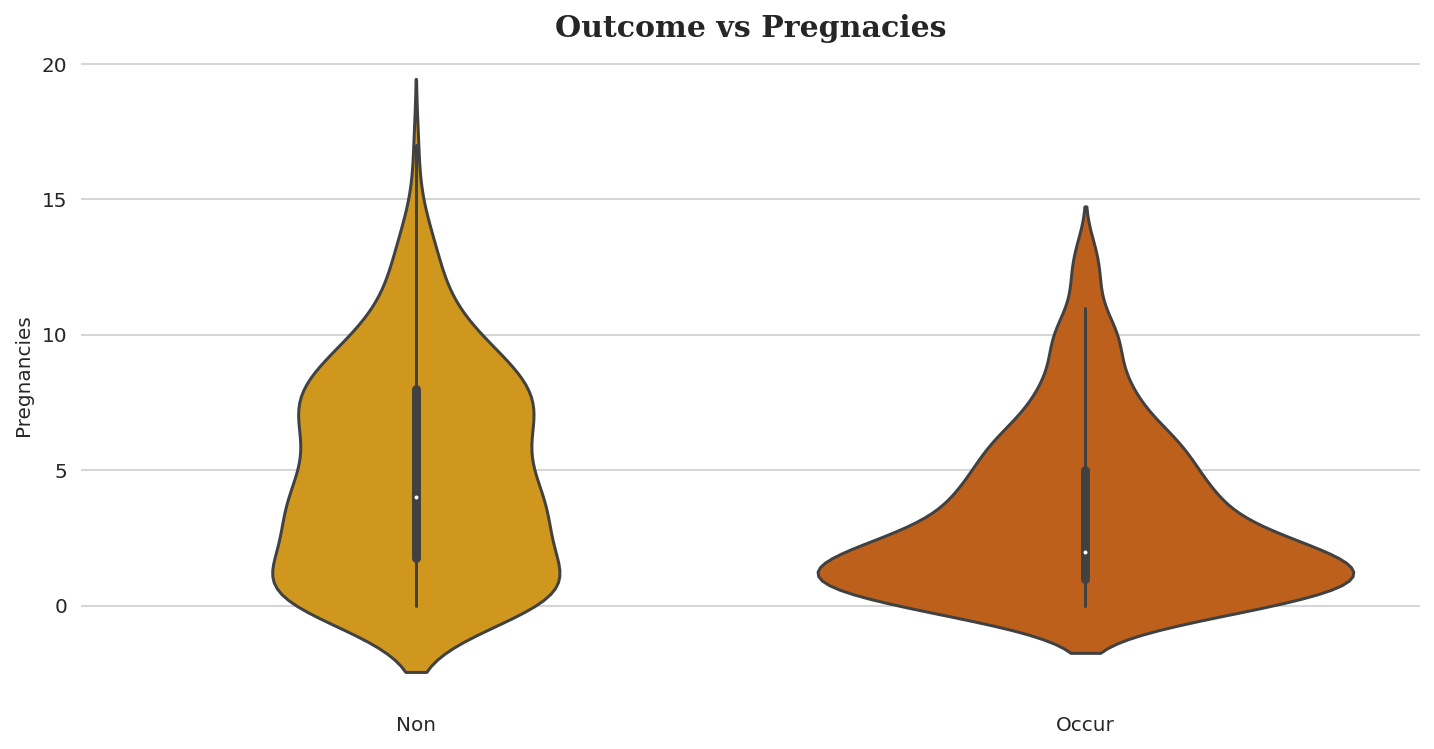

In [95]:
a = data.Outcome.replace({0:'Occur', 1:'Non'})
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.violinplot(x=a, y=data.Pregnancies, split=True, scale='count', palette=sns.color_palette('gnuplot_r'))  

for x in ['top', 'bottom', 'left', 'right']:
  ax.spines[x].set_visible(False)

ax.set_title('Outcome vs Pregnacies', fontsize=15, fontfamily='serif', fontweight='bold')
ax.set_xlabel('')
## 당뇨병이 발병 안했을때(0) : 임신초기 임산부가 많다. ==> 임신초기 발병률이 낮다.
## 당뇨병이 발병 했을때(1) : 임신중기 넘어서 임산부 숫자가 많다. ==> 임신 중기부터 발병률이 높다.
## outcome=1일때 환자들이 고르게 분포(초기, 중기)하고있다. 그렇다면 별로 연관성이 없을까?? 

In [136]:
data_og = data.groupby('Outcome')['Glucose'].mean()          ## Outcome과 Glu의 그룹바이
data_ob = data.groupby('Outcome')['BloodPressure'].mean()    ## Outcome과 Blood의 그룹바이
data_os = data.groupby('Outcome')['SkinThickness'].mean()    ## Outcome과 skin의 그룹바이
data_oi = data.groupby('Outcome')['Insulin'].mean()          ## Outcome과 insulin의 그룹바이
data_obmi =data.groupby('Outcome')['BMI'].mean()             ## Outcome과 BMI의 그룹바이
data_od = data.groupby('Outcome')['DiabetesPedigreeFunction'].mean()   ## Outcome과 DiabetesPedigreeFunction의 그룹바이
data_da = data.groupby('Outcome')['Age'].mean()              ## Outcome과 AGE의 그룹바이

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64

Text(0.5, 1.0, 'Glucose vs Insulin')

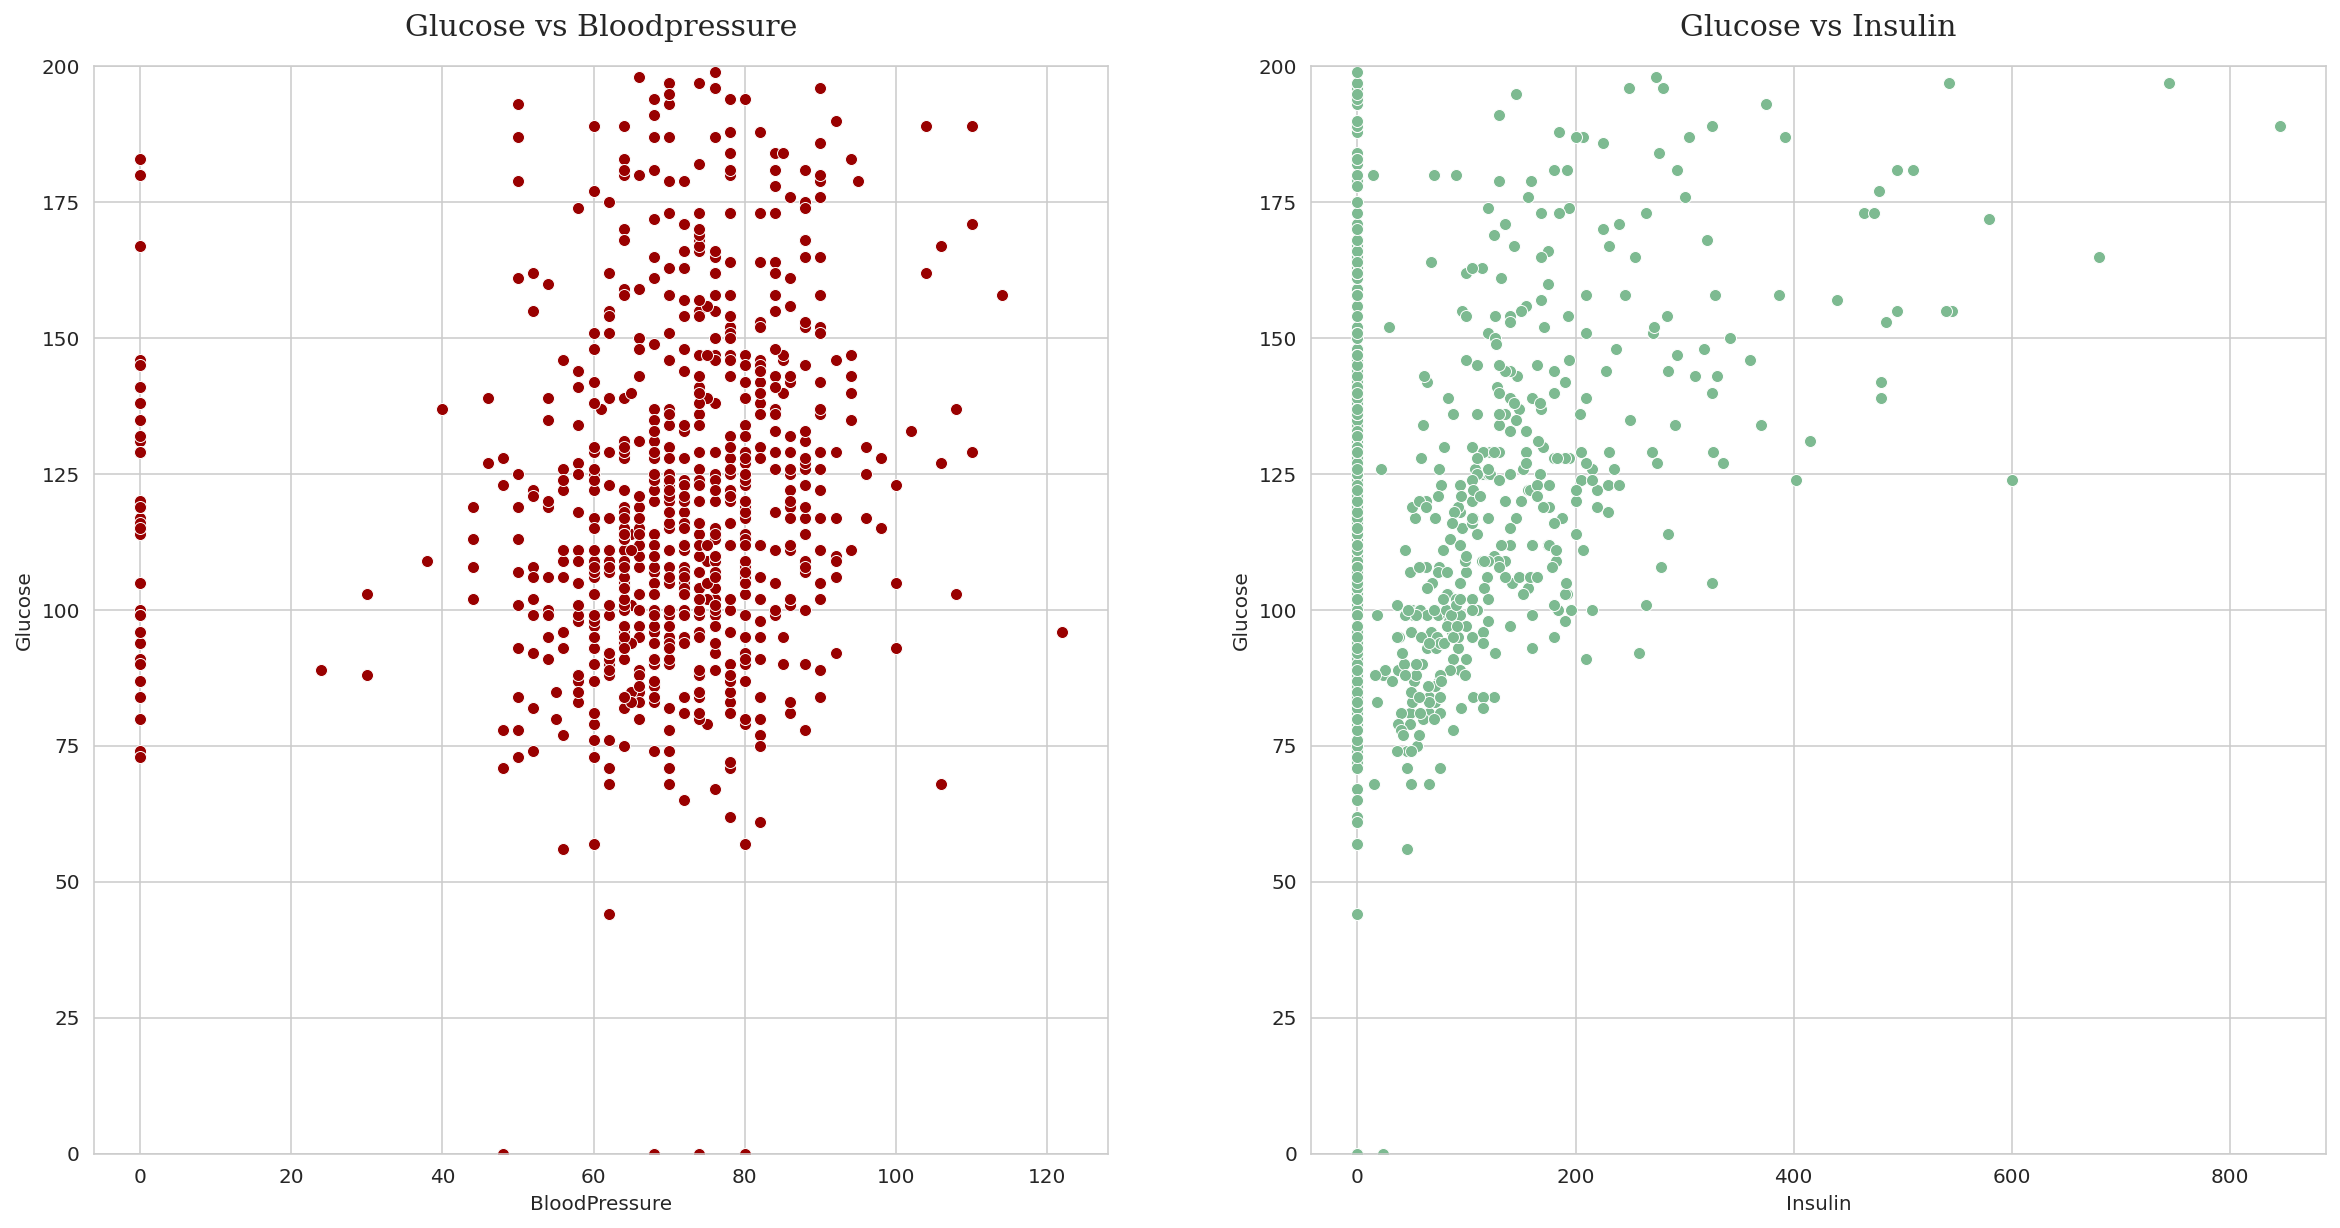

In [127]:
fig, ax = plt.subplots(1,2, figsize=(20,10)) 
sns.scatterplot(x=data.BloodPressure, y=data.Glucose, ax=ax[0], color='#990000')
ax[0].set_ylim(0,200)
ax[0].set_title('Glucose vs Bloodpressure', pad=15, fontsize=15, fontfamily='serif')
sns.scatterplot(x=data['Insulin'], y=data['Glucose'], ax=ax[1], palette='#990000')
ax[1].set_ylim(0,200)
ax[1].set_title('Glucose vs Insulin', pad=15, fontsize=15, fontfamily='serif')
## Gluecose의 연관성을 알아보기 위한 그래프

In [440]:
### 시각화 더 해보기, 필사하기

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_cut_higher,BMI_cut_lower,BMI_cut_norm,Age_cut_20대중반,Age_cut_20대초반,Age_cut_20대후반,Age_cut_30대,Age_cut_고령,Age_cut_중간,glu_cut_a,glu_cut_b,glu_cut_c,glu_cut_d,glu_cut_e,Blood_cut_2nd,Blood_cut_3rd,Blood_cut_4rd,Blood_cut_5rd,Skin_cut_1st,Skin_cut_5rd,Pregnancies_0,Pregnancies_1,Pregnancies_2,Pregnancies_3,Pregnancies_4,Pregnancies_5,Pregnancies_6,Pregnancies_7,Pregnancies_8,Pregnancies_9,Pregnancies_10,Pregnancies_11,Pregnancies_12,Pregnancies_13,Pregnancies_14,Pregnancies_15,Pregnancies_17
0,148.0,72.0,35.000000,149.054054,33.6,0.627,50,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,85.0,66.0,29.000000,36.294118,26.6,0.351,31,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,183.0,64.0,20.010638,150.061176,23.3,0.672,32,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
764,122.0,70.0,27.000000,111.430604,36.8,0.340,27,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
765,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
766,126.0,60.0,27.610390,152.095779,30.1,0.349,47,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [439]:
data = pd.get_dummies(data, columns=['BMI_cut',	'Age_cut',	'glu_cut',	'Blood_cut',	'Skin_cut', 'Pregnancies'])
## 원핫코딩(get_dummies를 이용)

In [441]:
X = data.drop(['Outcome'], axis=1)
Y = data['Outcome']

In [453]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [443]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.33, random_state=10)

In [449]:
print('X_train shape : ' ,X_train.shape)
print('X_test shape : ' ,X_test.shape)
print('Y_train shape : ',Y_train.shape)   
print('Y_test shape : ', Y_test.shape)
## Y_는 Outcome을 가지기 때문에 컬럼이 없다.

X_train shape :  (514, 44)
X_test shape :  (254, 44)
Y_train shape :  (514,)
Y_test shape :  (254,)


In [455]:
model = svm.SVC(kernel='linear')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print('SVM lin의 정확성 점수는:', accuracy_score(y_pred, Y_test))
print('SVM lin의 정밀성 점수는:', recall_score(y_pred, Y_test))

SVM lin의 정확성 점수는: 0.7244094488188977
SVM lin의 정밀성 점수는: 0.72


In [464]:
model = svm.SVC(kernel='rbf')
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print('SVM rbf의 정확성 점수는:', accuracy_score(y_pred, Y_test))
print('SVM rbf의 정밀성 점수는:', recall_score(y_pred, Y_test))
model.fit(X_train, Y_train).score(X_train, Y_train)

SVM rbf의 정확성 점수는: 0.7047244094488189
SVM rbf의 정밀성 점수는: 0.6808510638297872


0.7801556420233463

In [458]:
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print('Logistic의 정확성 점수는:', accuracy_score(y_pred, Y_test))
print('Logistic의 정밀성 점수는:', recall_score(y_pred, Y_test))

Logistic의 정확성 점수는: 0.7480314960629921
Logistic의 정밀성 점수는: 0.7058823529411765


In [459]:
model = ExtraTreeClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print('ExtraTree의 정확성 점수는:', accuracy_score(y_pred, Y_test))
print('ExtraTree의 정밀성 점수는:', recall_score(y_pred, Y_test))

ExtraTree의 정확성 점수는: 0.6889763779527559
ExtraTree의 정밀성 점수는: 0.5764705882352941
